In [38]:
##Hello , this is my first jupyter notebook

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold

In [40]:
np.random.seed(0)

In [41]:
#Dog: higher
dogs_whisker_length = np.random.normal(loc = 5 , scale= 1 , size = 10)
dogs_ear_flappines_index = np.random.normal(loc = 8 , scale = 1 , size = 10)

In [42]:
#cats: lower 
cats_whisker_length = np.random.normal(loc = 8 , scale = 1 , size = 10)
cats_ear_flappines = np.random.normal(loc = 5 , scale = 1 , size = 10)

In [43]:
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappines_index)).T
cats_data= np.vstack((cats_whisker_length , cats_ear_flappines)).T
data = np.vstack((dogs_data ,cats_data))
dog_labels = np.zeros(len(dogs_data))
cat_labels = np.ones(len(cats_data))
labels = np.concatenate((dog_labels, cat_labels))

In [44]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [45]:
#Split data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(data , labels , test_size= 0.2 , random_state=42)

In [46]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

In [47]:
X_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

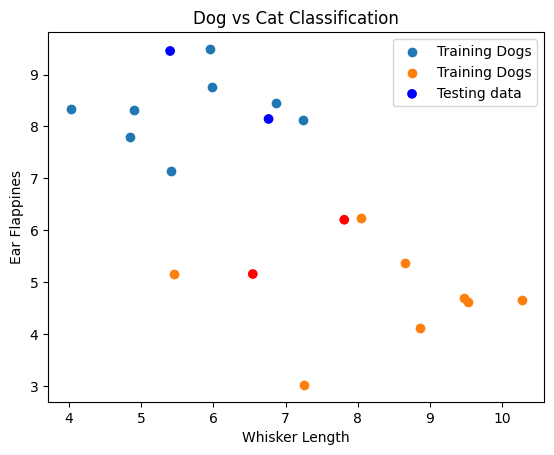

In [48]:
plt.scatter(X_train[y_train == 0][:,0] , X_train[y_train == 0][:,1], label = 'Training Dogs')
plt.scatter(X_train[y_train == 1][:,0] , X_train[y_train == 1][:,1], label = 'Training Dogs')
plt.scatter(X_test[:, 0], X_test[:, 1] , c = y_test , cmap='bwr' , label = 'Testing data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappines')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.show()

In [49]:
#Implementing random Linear  Classifier algorithms 
def random_linear_classifier(data_dogs , data_cats , k , d):
    #d= number_of_features
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size = d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs , data_cats , theta , theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
        
    return best_theta , best_theta0

In [50]:
#compute error
def compute_error(data_dogs , data_cats, theta , theta0):
    error = 0 

    for x_dog in data_dogs:
        if np.dot(theta , x_dog) + theta0 <= 0 :
            error += 1 
    
    for x_cats in data_cats :
        if np.dot(theta , x_cats) + theta0 > 0 :
            error += 1 

    return error

In [51]:
#preparing data for alogorithm
k = 200
d = 2
best_theta_train , best_theta0_train = random_linear_classifier(X_train[y_train == 0], X_train[y_train == 1] , k , d)

In [52]:
x_vals_train = np.linspace(2,10,100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1] * x_vals_train - (best_theta0_train /best_theta_train[1]))

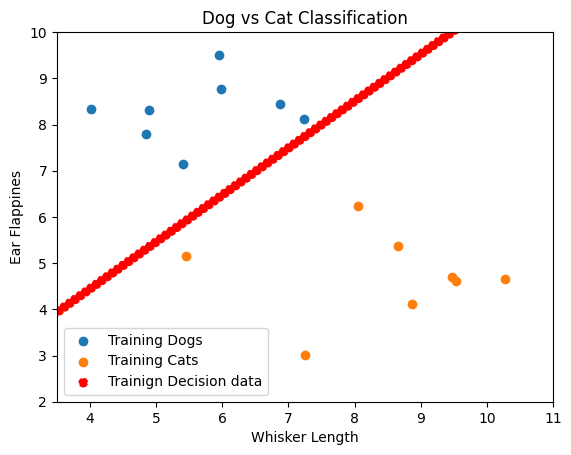

In [53]:
plt.scatter(X_train[y_train == 0][:,0] , X_train[y_train == 0][:,1], label = 'Training Dogs')
plt.scatter(X_train[y_train == 1][:,0] , X_train[y_train == 1][:,1], label = 'Training Cats')
plt.scatter(x_vals_train ,y_vals_train ,color = 'red' , linestyle='--' , label = 'Trainign Decision data')

plt.xlim([3.5 , 11])
plt.ylim([2 , 10])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappines')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.show()

In [54]:
#Run random linear classifiers algorithm
k = 100 # number of iterations
d = 2
best_theta , best_theta0 = random_linear_classifier(dogs_data , cats_data , k , d)

In [55]:
test_error =compute_error(X_test[y_test == 0] , X_test[y_test == 1] , best_theta_train , best_theta0_train)
print(test_error)

0


In [59]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [57]:
#plot the decision boundary
x_vals = np.linspace(2 , 10 , 100)
y_vals = (-best_theta[0] / best_theta[1] * x_vals - (best_theta0 / best_theta[1]))

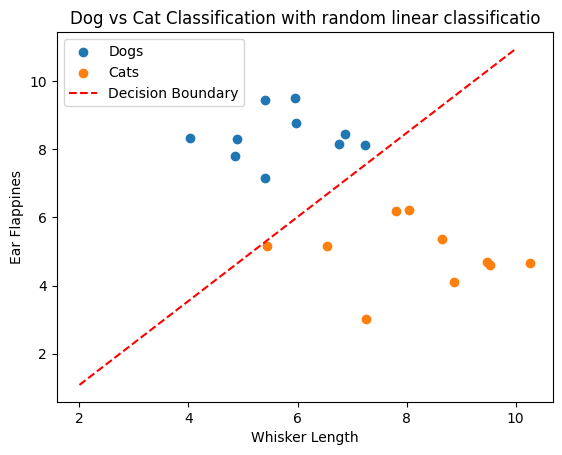

In [58]:
plt.scatter(dogs_whisker_length , dogs_ear_flappines_index , label = 'Dogs')
plt.scatter(cats_whisker_length , cats_ear_flappines, label = 'Cats')
plt.plot(x_vals , y_vals , color = 'red' , linestyle = '--' , label = 'Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappines')
plt.title('Dog vs Cat Classification with random linear classificatio')
plt.legend()
plt.show()

In [62]:
def cross_validation(dogs_data , cats_data , k_values , n_splits = 5):
    kf = KFold(n_splits= n_splits , shuffle= True , random_state= 42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index , val_index in kf.split(dogs_data):
            X_train_fold = np.vstack((dogs_data[train_index] , cats_data[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((dogs_data[val_index] , cats_data[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)) , np.ones(len(val_index))))

            best_theta_fold , best_theta0_fold = random_linear_classifier(X_train_fold[y_train_fold == 0], X_train_fold[y_train_fold == 1] , k , d)

            errors.append(compute_error(X_val_fold[y_val_fold == 0] , X_val_fold[y_val_fold == 1] , best_theta_fold , best_theta0_fold))


        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k

#Define k values to try 
k_values = [1 , 10 , 50, 100 , 200]

best_k = cross_validation(dogs_data , cats_data , k_values )
print(f"Best values of i k : {best_k}" )

Best values of i k : 50


In [ ]:
#Run random linear classifiers algorithm
k = 100 # number of iterations
d = 2
best_theta , best_theta0 = random_linear_classifier(dogs_data , cats_data , k , d)